In [1]:
import tensorflow as tf
import keras 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection import chi2 , f_classif ,SelectKBest
from imblearn.over_sampling import SMOTE
import missingno as msno
import warnings
warnings.filterwarnings('ignore')
from keras.metrics import MeanSquaredError
from datetime import datetime
from sklearn.metrics import mean_squared_error , mean_absolute_error
from sklearn import preprocessing 

2024-08-09 09:27:59.444644: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-09 09:27:59.444778: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-09 09:27:59.671974: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
df=pd.read_csv(R'/kaggle/input/covid-19-prediction-binary-classification/corona.csv')
df

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [3]:
df.drop(['Ind_ID'], inplace=True, axis=1)
df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [4]:
df.isna().sum()

Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [5]:
df.drop(['Age_60_above'],axis=1,inplace=True)
df.isna().sum()

Test_date                  0
Cough_symptoms           252
Fever                    252
Sore_throat                1
Shortness_of_breath        1
Headache                   1
Corona                     0
Sex                    19563
Known_contact              0
dtype: int64

In [6]:
df=df.dropna()
df.isna().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Sex                    0
Known_contact          0
dtype: int64

In [7]:
df.shape

(259042, 9)

In [8]:
df.dtypes

Test_date              object
Cough_symptoms         object
Fever                  object
Sore_throat            object
Shortness_of_breath    object
Headache               object
Corona                 object
Sex                    object
Known_contact          object
dtype: object

In [9]:
df['Test_date'] = pd.to_datetime(df['Test_date'], format='%d-%m-%Y').dt.strftime('%m-%d-%Y')

In [10]:
df.Test_date= pd.to_datetime(df.Test_date)
df.dtypes

Test_date              datetime64[ns]
Cough_symptoms                 object
Fever                          object
Sore_throat                    object
Shortness_of_breath            object
Headache                       object
Corona                         object
Sex                            object
Known_contact                  object
dtype: object

In [11]:
df.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
13727,2020-03-22,True,False,False,False,False,negative,male,Abroad
13728,2020-03-22,True,False,False,False,False,negative,female,Abroad
13730,2020-03-22,True,True,False,False,False,positive,female,Other
13731,2020-03-22,False,False,False,False,False,other,female,Other
13732,2020-03-22,False,False,False,False,False,other,female,Other


In [12]:
df['Corona'].values

array(['negative', 'negative', 'positive', ..., 'negative', 'negative',
       'negative'], dtype=object)

In [13]:
cols = df.columns[df.dtypes.eq('object')]
df[cols].head()

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
13727,True,False,False,False,False,negative,male,Abroad
13728,True,False,False,False,False,negative,female,Abroad
13730,True,True,False,False,False,positive,female,Other
13731,False,False,False,False,False,other,female,Other
13732,False,False,False,False,False,other,female,Other


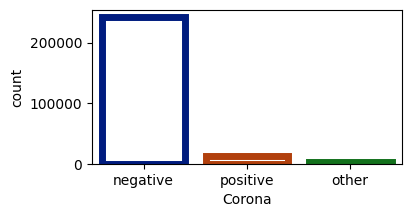

In [14]:
def CPlot(feature) : 
    global data
    fig, ax = plt.subplots(figsize=(4,2))
    sns.countplot(x=feature, data=df,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

CPlot('Corona')

In [15]:

df = df[df['Corona'] != 'other']
df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
13727,2020-03-22,True,False,False,False,False,negative,male,Abroad
13728,2020-03-22,True,False,False,False,False,negative,female,Abroad
13730,2020-03-22,True,True,False,False,False,positive,female,Other
13734,2020-03-22,False,False,False,False,False,negative,male,Other
13735,2020-03-22,False,False,False,False,False,negative,female,Other
...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,False,False,False,False,False,positive,male,Other
278844,2020-04-30,False,False,False,False,False,negative,female,Other
278845,2020-04-30,False,False,False,False,False,negative,male,Other
278846,2020-04-30,False,False,False,False,False,negative,male,Other


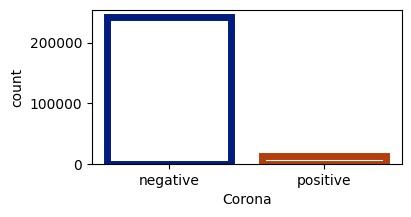

In [16]:
def CPlot(feature) : 
    global data
    fig, ax = plt.subplots(figsize=(4,2))
    sns.countplot(x=feature, data=df,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

CPlot('Corona')

In [17]:
le = LabelEncoder()
df[cols] = df[cols].apply(le.fit_transform)

In [18]:
df.dtypes

Test_date              datetime64[ns]
Cough_symptoms                  int64
Fever                           int64
Sore_throat                     int64
Shortness_of_breath             int64
Headache                        int64
Corona                          int64
Sex                             int64
Known_contact                   int64
dtype: object

In [19]:
pd.DataFrame(df)

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact
13727,2020-03-22,1,0,0,0,0,0,1,0
13728,2020-03-22,1,0,0,0,0,0,0,0
13730,2020-03-22,1,1,0,0,0,1,0,2
13734,2020-03-22,0,0,0,0,0,0,1,2
13735,2020-03-22,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,0,0,0,0,0,1,1,2
278844,2020-04-30,0,0,0,0,0,0,0,2
278845,2020-04-30,0,0,0,0,0,0,1,2
278846,2020-04-30,0,0,0,0,0,0,1,2


In [20]:
df.corr(numeric_only = True)['Corona'].sort_values(ascending=False)

Corona                 1.000000
Headache               0.366278
Sore_throat            0.293147
Fever                  0.260399
Shortness_of_breath    0.248565
Cough_symptoms         0.194106
Sex                    0.026961
Known_contact         -0.197408
Name: Corona, dtype: float64

In [21]:
def CPlot(feature) : 
    global data
    fig, ax = plt.subplots(figsize=(4,2))
    sns.countplot(x=feature, data=df,facecolor=(0, 0, 0, 0),linewidth=5,edgecolor=sns.color_palette("dark", 3))

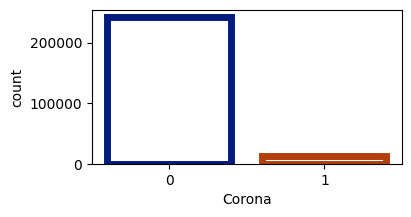

In [22]:
CPlot('Corona')

In [23]:
x = df.drop(['Corona','Test_date','Known_contact'], inplace=False, axis=1)
x

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex
13727,1,0,0,0,0,1
13728,1,0,0,0,0,0
13730,1,1,0,0,0,0
13734,0,0,0,0,0,1
13735,0,0,0,0,0,0
...,...,...,...,...,...,...
278843,0,0,0,0,0,1
278844,0,0,0,0,0,0
278845,0,0,0,0,0,1
278846,0,0,0,0,0,1


In [24]:
y=df['Corona']
y

13727     0
13728     0
13730     1
13734     0
13735     0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 255668, dtype: int64

In [25]:
#smote= SMOTE(random_state=44)
#x_balanced,y_balanced=smote.fit_resample(x,y)

In [26]:
#balanced=y_balanced.value_counts()
#balanced

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=44,shuffle=True)
print('x_train shape is ' , x_train.shape)
print('x_test shape is ' , x_test.shape)
print('y_train shape is ' , y_train.shape)
print('y_test shape is ' , y_test.shape)

x_train shape is  (178967, 6)
x_test shape is  (76701, 6)
y_train shape is  (178967,)
y_test shape is  (76701,)


In [28]:
KerasModel = keras.models.Sequential([
        keras.layers.Dense(64,  activation ='tanh' ),
        keras.layers.Dense(128, activation = 'tanh'),
        #keras.layers.Dropout(0.2),
        keras.layers.Dense(512, activation = 'tanh'),
      #  keras.layers.Dropout(0.2),
        keras.layers.Dense(64, activation = 'tanh'),
      #  keras.layers.Dropout(0.2),
        keras.layers.Dense(32, activation = 'tanh'),
        keras.layers.Dense(8, activation = 'tanh'),
                keras.layers.Dense(1, activation = 'sigmoid'),
        ])

In [29]:
KerasModel.compile(optimizer ='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history = KerasModel.fit(x_train,y_train,
                         validation_data=(x_test,y_test),
                         epochs=100,
                         batch_size=10000,
                         verbose=1,
                         callbacks=[tf.keras.callbacks.EarlyStopping(
                                            patience=10,
                                            monitor='val_accuracy',#"val_loss",
                                            restore_best_weights=True)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 5s 119ms/step - accuracy: 0.9465 - loss: 0.4303 - val_accuracy: 0.9473 - val_loss: 0.2252
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9474 - loss: 0.2220 - val_accuracy: 0.9517 - val_loss: 0.2055
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 101ms/step - accuracy: 0.9540 - loss: 0.1989 - val_accuracy: 0.9580 - val_loss: 0.1858
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.9581 - loss: 0.1845 - val_accuracy: 0.9591 - val_loss: 0.1788
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 100ms/step - accuracy: 0.9584 - loss: 0.1796 - val_accuracy: 0.9591 - val_loss: 0.1746
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.9596 - loss: 0.1720 - val_accuracy: 0.9591 - val_loss: 0.1691
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 102ms/step - accuracy: 0.9595 - loss: 0.1672 - val_accuracy: 0.9591 - val_loss: 0.1644
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 102ms/step - accuracy: 0.9594 - loss: 0.1633 - val_accu

In [31]:
y_pred =KerasModel.predict(x_test)

print('Prediction Shape is {}'.format(y_pred.shape))

2397/2397 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Prediction Shape is (76701, 1)


In [32]:
ModelLoss, ModelAccuracy = KerasModel.evaluate(x_test, y_test)
print('Model Loss is {}'.format(ModelLoss))
print('Model Accuracy is {}'.format(ModelAccuracy ))

2397/2397 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9590 - loss: 0.1790
Model Loss is 0.17882664501667023
Model Accuracy is 0.9591270089149475


In [33]:
history.history['accuracy']

[0.9469902515411377,
 0.9489514827728271,
 0.9548072814941406,
 0.9587801098823547,
 0.9591600894927979,
 0.9591600894927979,
 0.9591600894927979,
 0.9591600894927979,
 0.9591600894927979,
 0.9591600894927979,
 0.9591600894927979,
 0.9591600894927979,
 0.9591600894927979,
 0.9591600894927979]

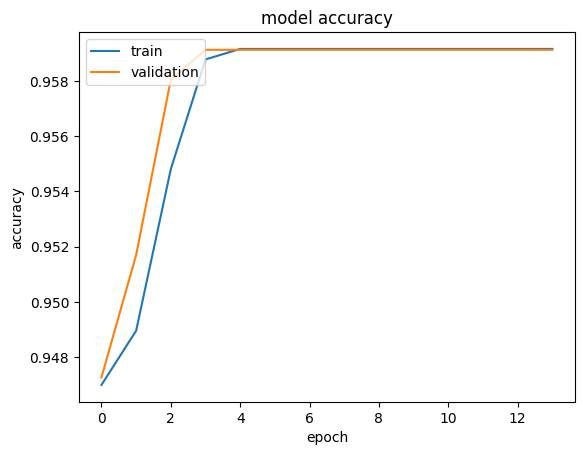

In [34]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [35]:
history.history['loss']

[0.32940933108329773,
 0.21640655398368835,
 0.19595760107040405,
 0.18196111917495728,
 0.17677871882915497,
 0.1716822385787964,
 0.16711893677711487,
 0.16321271657943726,
 0.16093800961971283,
 0.15944965183734894,
 0.15850304067134857,
 0.15780678391456604,
 0.15711423754692078,
 0.1565527766942978]

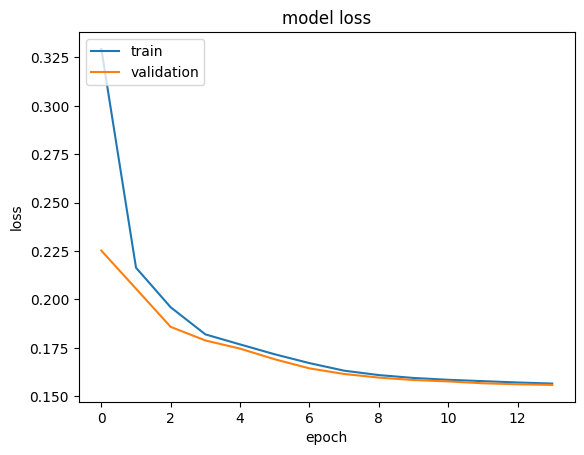

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [37]:
len(y_test), len(y_pred)

(76701, 76701)

In [38]:
y_pred

array([[0.07238178],
       [0.07238178],
       [0.07192875],
       ...,
       [0.07238178],
       [0.07238178],
       [0.07238178]], dtype=float32)

In [39]:
y_test

139336    0
22952     0
152645    0
193640    0
33516     0
         ..
220170    0
246996    0
99719     0
192997    0
97606     0
Name: Corona, Length: 76701, dtype: int64

In [40]:
y_pred = [np.round(i[0]) for i in y_pred]


In [41]:
from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_pred)
print('Confusion Matrix is : \n', CM)

Confusion Matrix is : 
 [[72576    80]
 [ 3055   990]]


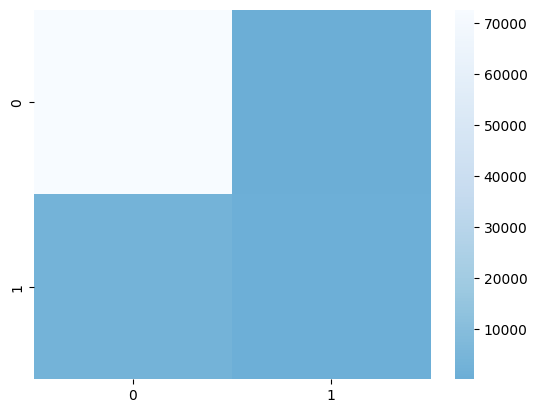

In [42]:
sns.heatmap(CM, center = True,cmap='Blues_r')
plt.show()

In [43]:
from sklearn.metrics import classification_report
ClassificationReport = classification_report(y_test,y_pred)
print('Classification Report is : \n', ClassificationReport )

Classification Report is : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     72656
           1       0.93      0.24      0.39      4045

    accuracy                           0.96     76701
   macro avg       0.94      0.62      0.68     76701
weighted avg       0.96      0.96      0.95     76701

